# Data Preprocessing Tools

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random

## Importing the dataset

In [ ]:
dataset_df = pd.read_csv('https://mlsmall.s3.ap-south-1.amazonaws.com/new_diabetes.csv')
print(dataset_df.shape)
blood_grp = ['Type A', 'Type B', 'Type O', 'Type AB']
dataset_df['blood_grp'] = np.random.choice(blood_grp, dataset_df.shape[0])
dataset_df.head(10)


(768, 10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,is_diabetic,blood_grp
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,U,Y,Type A
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,F,N,Type O
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,U,Y,Type A
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,M,N,Type A
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,M,Y,Type A
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,F,N,Type AB
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,F,Y,Type B
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,U,N,Type O
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,M,Y,Type B
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,U,Y,Type B


In [ ]:
dataset_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   gender                    768 non-null    object 
 9   is_diabetic               768 non-null    object 
 10  blood_grp                 768 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 66.1+ KB


In [ ]:
dataset_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
X = dataset_df.iloc[:, :-1].values
y = dataset_df.iloc[:, -1].values

In [ ]:
print(X)

[[6 148.0 72.0 ... 50 'U' 'Y']
 [1 85.0 66.0 ... 31 'F' 'N']
 [8 183.0 64.0 ... 32 'U' 'Y']
 ...
 [5 121.0 72.0 ... 30 'F' 'N']
 [1 126.0 60.0 ... 47 'U' 'Y']
 [1 93.0 70.0 ... 23 'F' 'N']]


In [ ]:
print(y)

['Type A' 'Type O' 'Type A' 'Type A' 'Type A' 'Type AB' 'Type B' 'Type O'
 'Type B' 'Type B' 'Type B' 'Type A' 'Type AB' 'Type O' 'Type A' 'Type O'
 'Type B' 'Type A' 'Type B' 'Type B' 'Type O' 'Type B' 'Type B' 'Type A'
 'Type AB' 'Type AB' 'Type AB' 'Type O' 'Type AB' 'Type A' 'Type AB'
 'Type O' 'Type A' 'Type B' 'Type O' 'Type O' 'Type B' 'Type B' 'Type O'
 'Type AB' 'Type A' 'Type B' 'Type O' 'Type A' 'Type AB' 'Type AB'
 'Type A' 'Type B' 'Type B' 'Type AB' 'Type O' 'Type O' 'Type O' 'Type AB'
 'Type AB' 'Type B' 'Type O' 'Type B' 'Type A' 'Type AB' 'Type A' 'Type O'
 'Type O' 'Type AB' 'Type B' 'Type O' 'Type O' 'Type A' 'Type A' 'Type O'
 'Type AB' 'Type A' 'Type O' 'Type O' 'Type A' 'Type AB' 'Type B' 'Type A'
 'Type O' 'Type O' 'Type A' 'Type O' 'Type O' 'Type A' 'Type A' 'Type B'
 'Type AB' 'Type AB' 'Type O' 'Type AB' 'Type AB' 'Type B' 'Type B'
 'Type O' 'Type O' 'Type O' 'Type A' 'Type B' 'Type O' 'Type B' 'Type AB'
 'Type AB' 'Type A' 'Type B' 'Type O' 'Type O' 'Type A' 

## Taking care of missing data

In [ ]:
# dataset_df['Glucose'].fillna(dataset_df['Glucose'].mean(), inplace=True)
# dataset_df.iloc[:, 1:8]

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset_df.iloc[:, 1:8])
dataset_df.iloc[:, 1:8] = imputer.transform(dataset_df.iloc[:, 1:8])

In [ ]:
dataset_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   gender                    768 non-null    object 
 9   is_diabetic               768 non-null    object 
 10  blood_grp                 768 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 66.1+ KB


In [ ]:
dataset_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,is_diabetic,blood_grp
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,U,Y,Type A
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,F,N,Type O
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,U,Y,Type A
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,M,N,Type A
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,M,Y,Type A


## Data Exploration

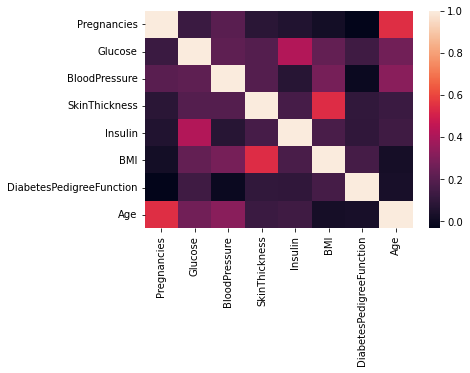

In [ ]:
pd.set_option('display.max_columns', None)
corr = dataset_df.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


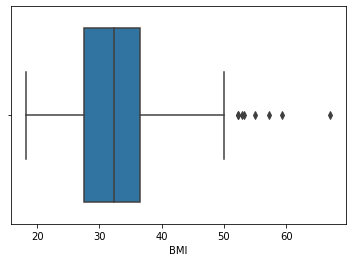

In [ ]:
# Checking outliers
sns.boxplot(dataset_df['BMI'])

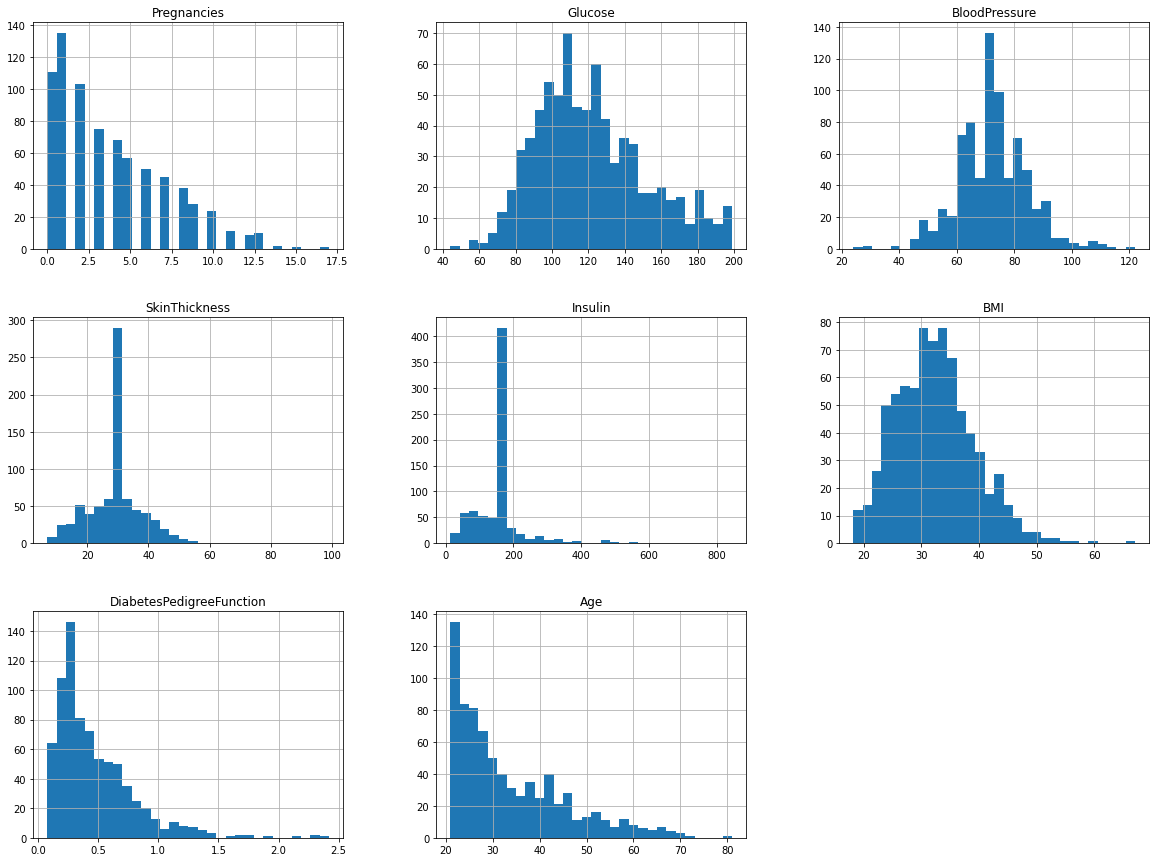

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset_df.hist(bins=30, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


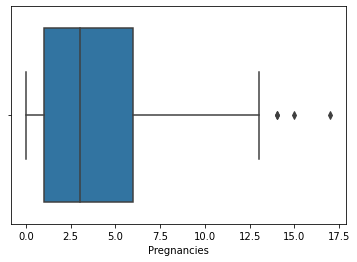

In [ ]:
sns.boxplot(dataset_df['Pregnancies'])

In [ ]:
dataset_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'gender', 'is_diabetic',
       'blood_grp'],
      dtype='object')

In [ ]:
dataset_df["BMI"] = dataset_df["BMI"].apply(lambda x: dataset_df.BMI.mean() if x>40 else x)

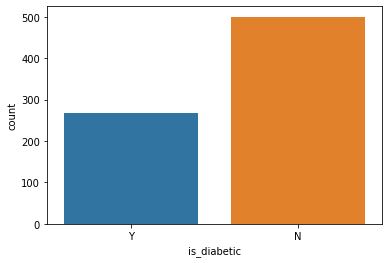

In [ ]:
sns.countplot(data = dataset_df, x = dataset_df['is_diabetic'])

## Encoding categorical data

In [ ]:
dataset_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,is_diabetic,blood_grp
0,6,148.0,72.0,35.00000,155.548223,33.600000,0.627,50.0,U,Y,Type A
1,1,85.0,66.0,29.00000,155.548223,26.600000,0.351,31.0,F,N,Type O
2,8,183.0,64.0,29.15342,155.548223,23.300000,0.672,32.0,U,Y,Type A
3,1,89.0,66.0,23.00000,94.000000,28.100000,0.167,21.0,M,N,Type A
4,0,137.0,40.0,35.00000,168.000000,32.457464,2.288,33.0,M,Y,Type A


### Encoding the Independent Variable

In [ ]:
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
dt_1 = dataset_df.copy(deep=True)
# gender_enc = dt_1[["gender"]]
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['gender'])], remainder='passthrough')
# dt_1 = np.array(ct.fit_transform(dt_1))
# ohe = OneHotEncoder()
# gender_enc_1hot = ohe.fit_transform(gender_enc)
# dm_df = pd.get_dummies(dt_1.gender)
dm_df = pd.get_dummies(dt_1.blood_grp)

In [ ]:
dt_1=pd.concat([dt_1,dm_df], axis=1)

### Encoding the Dependent Variable

In [ ]:
dt_1['is_diabetic'].value_counts()

N    500
Y    268
Name: is_diabetic, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
dt_1['is_diabetic'] = LabelEncoder().fit_transform(dt_1['is_diabetic'].astype(str))

In [ ]:
dt_1['is_diabetic'].value_counts()

0    500
1    268
Name: is_diabetic, dtype: int64

In [ ]:
dt_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,gender,is_diabetic,blood_grp,Type A,Type AB,Type B,Type O
0,6,148.0,72.0,35.00000,155.548223,33.600000,0.627,50.0,U,1,Type A,1,0,0,0
1,1,85.0,66.0,29.00000,155.548223,26.600000,0.351,31.0,F,0,Type O,0,0,0,1
2,8,183.0,64.0,29.15342,155.548223,23.300000,0.672,32.0,U,1,Type A,1,0,0,0
3,1,89.0,66.0,23.00000,94.000000,28.100000,0.167,21.0,M,0,Type A,1,0,0,0
4,0,137.0,40.0,35.00000,168.000000,32.457464,2.288,33.0,M,1,Type A,1,0,0,0


## Splitting the dataset into the Training set and Test set

In [ ]:
X = dt_1.drop(columns=['gender', 'is_diabetic', 'blood_grp'])
y = dt_1['is_diabetic']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Type A,Type AB,Type B,Type O
663,9,145.0,80.0,46.00000,130.000000,37.900000,0.637,40.0,0,0,1,0
712,10,129.0,62.0,36.00000,155.548223,32.457464,0.441,38.0,0,1,0,0
161,7,102.0,74.0,40.00000,105.000000,37.200000,0.204,45.0,0,1,0,0
509,8,120.0,78.0,29.15342,155.548223,25.000000,0.409,64.0,1,0,0,0
305,2,120.0,76.0,37.00000,105.000000,39.700000,0.215,29.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
645,2,157.0,74.0,35.00000,440.000000,39.400000,0.134,30.0,0,0,0,1
715,7,187.0,50.0,33.00000,392.000000,33.900000,0.826,34.0,0,0,0,1
72,13,126.0,90.0,29.15342,155.548223,32.457464,0.583,42.0,0,0,0,1
235,4,171.0,72.0,29.15342,155.548223,32.457464,0.479,26.0,0,0,0,1


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Type A,Type AB,Type B,Type O
285,7,136.0,74.000000,26.00000,135.000000,26.000000,0.647,51.0,0,1,0,0
101,1,151.0,60.000000,29.15342,155.548223,26.100000,0.179,22.0,0,1,0,0
581,6,109.0,60.000000,27.00000,155.548223,25.000000,0.206,27.0,0,0,0,1
352,3,61.0,82.000000,28.00000,155.548223,34.400000,0.243,46.0,1,0,0,0
726,1,116.0,78.000000,29.00000,180.000000,36.100000,0.496,25.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
563,6,99.0,60.000000,19.00000,54.000000,26.900000,0.497,32.0,0,0,1,0
318,3,115.0,66.000000,39.00000,140.000000,38.100000,0.150,28.0,0,0,0,1
154,8,188.0,78.000000,29.15342,155.548223,32.457464,0.137,43.0,0,0,1,0
684,5,136.0,82.000000,29.15342,155.548223,32.457464,0.640,69.0,1,0,0,0


In [ ]:
print(y_train)

663    1
712    1
161    0
509    0
305    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: is_diabetic, Length: 614, dtype: int64


In [ ]:
print(y_test)

285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: is_diabetic, Length: 154, dtype: int64


## Feature Scaling

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# pipe = Pipeline([
#     ('imputer',SimpleImputer(strategy="median")),
#     ('std_scaler',StandardScaler())
# ])
# df_tr = pipe.fit_transform(imputer_df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
 
rescaled_df = scaler.fit_transform(X_train)
df_train = pd.DataFrame(rescaled_df, columns=X_train.columns)
 
rescaled_df = scaler.fit_transform(X_test)
df_test = pd.DataFrame(rescaled_df, columns=X_test.columns)

In [ ]:
df_train.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Type A,Type AB,Type B,Type O
0,0.600000,0.655844,0.571429,0.423913,0.138387,0.903670,0.246325,0.372549,0.0,0.0,1.0,0.0
1,0.666667,0.551948,0.387755,0.315217,0.169131,0.654012,0.159020,0.333333,0.0,1.0,0.0,0.0


## Training a model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics, datasets, ensemble
from sklearn.model_selection import cross_val_score

In [ ]:
clf = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion="gini",
    max_depth=13,
    max_features=0.7,
    max_leaf_nodes=None,
    max_samples=0.8,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    n_estimators=110,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False,
)
 
# Train
clf.fit(df_train, y_train)
# Predict 
y_pred_rfc = clf.predict(df_test)
clf.score(df_test, y_test)

0.7597402597402597

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfc).ravel()
tn, fp, fn, tp

(87, 12, 25, 30)

In [ ]:
print(classification_report(y_test, y_pred_rfc, digits=3))

              precision    recall  f1-score   support

           0      0.777     0.879     0.825        99
           1      0.714     0.545     0.619        55

    accuracy                          0.760       154
   macro avg      0.746     0.712     0.722       154
weighted avg      0.754     0.760     0.751       154

